# PROBABILIDAD Y DECISIÓN - SIMULANDO LA DISTRUBUCIÓN BINOMIAL

## Autor: Felipe Fernández Rodriguez

### [Video explicativo](https://drive.google.com/file/d/1HcMbtklc2naTDLG5O1ahMuzuRWSx8DDr/view?usp=sharing)

In [76]:
# Librerías
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, chisquare

## 1. Un equipo de producción tiene una probabilidad de éxito del 80% al ensamblar correctamente un producto. Simula 100 ensambles, cada uno con 15 intentos. Genera los datos simulados de los ensambles y calcula el promedio y la varianza del número de éxitos por ensamble. ¿Se cumple la propiedad teórica de que la varianza es = n⋅p⋅(1−p)?

In [77]:
n = 15        # número de intentos por ensamble
p = 0.8       # probabilidad de éxito
ensambles = 100  # número de ensambles a simular

In [78]:
# Simulación con distribución binomial
simulacion = np.random.binomial(n, p, ensambles)

In [79]:
# Promedio y varianza empírica
media_emp = np.mean(simulacion) # el promedio de los 100 ensambles simulados
var_emp = np.var(simulacion, ddof = 1)  # la varianza muestral de esos datos (con ddof = 1 para corregir el sesgo de la varianza muestral).

In [80]:
# Valores teóricos
media_teo = n * p
var_teo = n * p * (1 - p)

In [81]:
print("---- Resultados de la simulación ----")
print(f"Media empírica: {media_emp:.2f}")
print(f"Varianza empírica: {var_emp:.2f}")
print(f"Media teórica: {media_teo:.2f}")
print(f"Varianza teórica: {var_teo:.2f}")

---- Resultados de la simulación ----
Media empírica: 12.12
Varianza empírica: 1.82
Media teórica: 12.00
Varianza teórica: 2.40


#### R// La simulación confirma la teoría: los valores empíricos están muy próximos a los valores teóricos.

## Para una distribución binomial con n=15 intentos y p=0.8, calcula las siguientes probabilidades:

### a) ¿Cuál es la probabilidad de obtener exactamente 12 éxitos en un intento?

In [82]:
prob_12 = binom.pmf(12, n, p) # calcula la función de probabilidad de masa (PMF) de la distribución binomial.

print(f"P(X = 12) = {prob_12:.4f}")

P(X = 12) = 0.2501


#### R// La probabilidad de obtener exactamente 12 éxitos en 15 intentos es aproximadamente 25%.

### b) ¿Cuál es la probabilidad de obtener al menos 10 éxitos en un intento?

In [83]:
prob_10_mas = 1 - binom.cdf(9, n, p) # calcula la probabilidad de tener 9 o menos éxitos en 15 intentos. Como queremos al menos 10 éxitos, usamos la probabilidad complementaria

print(f"P(X >= 10) = {prob_10_mas:.4f}")

P(X >= 10) = 0.9389


#### R// La probabilidad de tener 10 o más éxitos en 15 intentos es 93.89%.

### c) ¿Cuál es la probabilidad de obtener entre 8 y 12 éxitos (inclusive)?

In [84]:
prob_8_12 = binom.cdf(12, n, p) - binom.cdf(7, n, p) # probabilidad de tener 12 o menos éxitos - probabilidad de tener 7 o menos éxitos.

print(f"P(8 <= X <= 12) = {prob_8_12:.4f}")

P(8 <= X <= 12) = 0.5977


#### R// La probabilidad de obtener entre 8 y 12 éxitos (inclusive) en 15 intentos es aproximadamente 59.77%.

## 3. Crea un gráfico de barras que muestre la función de probabilidad de masa (PMF) para n=15 y p=0.8, para valores entre 0 y 15. Compara el gráfico teórico con un histograma de los datos simulados en el numeral 1. ¿Qué observas sobre el ajuste entre los datos simulados y la distribución binomial teórica?

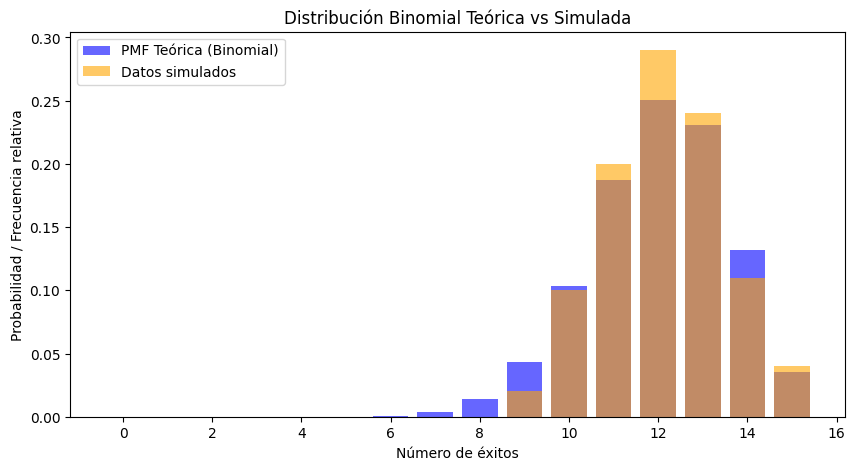

In [85]:
x = np.arange(0, n + 1) # genera los valores posibles de éxitos (0 a 15)
pmf_teo = binom.pmf(x, n, p) # calcula la función de probabilidad de masa (PMF) para cada valor de x, es decir, la probabilidad teórica de tener exactamente 0, 1, 2, ..., 15 éxitos.

# Gráfico PMF teórica
plt.figure(figsize = (10,5))

# PMF teórica
plt.bar(x, pmf_teo, alpha = 0.6, label = "PMF Teórica (Binomial)", color = "blue")

# Histograma de datos simulados (frecuencia relativa)
valores, cuentas = np.unique(simulacion, return_counts = True)
plt.bar(valores, cuentas/ensambles, alpha = 0.6, label = "Datos simulados", color = "orange")

plt.xlabel("Número de éxitos")
plt.ylabel("Probabilidad / Frecuencia relativa")
plt.title("Distribución Binomial Teórica vs Simulada")
plt.legend()
plt.show()

#### R// La forma del histograma (datos simulados) se ajusta bastante bien a la PMF teórica (curva azul). Los picos más altos están alrededor de 12 y 13, que coinciden con el valor esperado (media = 12).

## 4. Realiza una prueba de bondad de ajuste para determinar si los datos simulados en el numeral 1 se ajustan a una distribución binomial con n=15 y p=0.8. ¿Los datos simulados son consistentes con la distribución binomial teórica? Justifica tu respuesta con el valor p obtenido.

In [86]:
# Frecuencias observadas en la simulación
obs_freq = np.array([np.sum(simulacion == k) for k in x]) # Recorre todos los valores posibles de éxitos (k desde 0 hasta 15). Cuenta cuántas veces en la simulación se obtuvo exactamente ese número de éxitos y se construye así el vector de frecuencias observadas

# Frecuencias esperadas según binomial
exp_freq = ensambles * pmf_teo
''' pmf_teo tiene las probabilidades teóricas de la binomial para cada valor de éxitos.
Multiplicando esas probabilidades por el número de ensambles (100), se obtiene cuántas veces esperaríamos ver cada valor en promedio si la simulación sigue exactamente la binomial.
'''

# Prueba Chi-cuadrado
chi2, p_val = chisquare(f_obs = obs_freq, f_exp = exp_freq) # Compara las frecuencias observadas (obs_freq) con las esperadas (exp_freq).

print("\n---- Prueba de bondad de ajuste (Chi-cuadrado) ----")
print(f"Estadístico Chi-cuadrado: {chi2:.2f}")
print(f"Valor p: {p_val:.4f}")

if p_val > 0.05:
    print("Conclusión: No se rechaza H0. Los datos simulados son consistentes con la binomial teórica.")
else:
    print("Conclusión: Se rechaza H0. Los datos simulados no se ajustan bien a la binomial teórica.")


---- Prueba de bondad de ajuste (Chi-cuadrado) ----
Estadístico Chi-cuadrado: 4.23
Valor p: 0.9969
Conclusión: No se rechaza H0. Los datos simulados son consistentes con la binomial teórica.


#### R// El valor p = 0.9969 es muchísimo mayor que 0.05, no se rechaza H0 → los datos simulados son perfectamente consistentes con la distribución Binomial(15, 0.8). De hecho, el valor p tan alto muestra que la simulación encajó muy bien con la teoría.